In [1]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#since we are goin to make lot of visualization, we are setting some visualization parameters in order to have same plot size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [3]:
#reading the CSV file
house = pd.read_csv('C:/Users/AKASH/Desktop/Stats ML/Maison.csv')

In [4]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [5]:
house = house.rename(columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [6]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


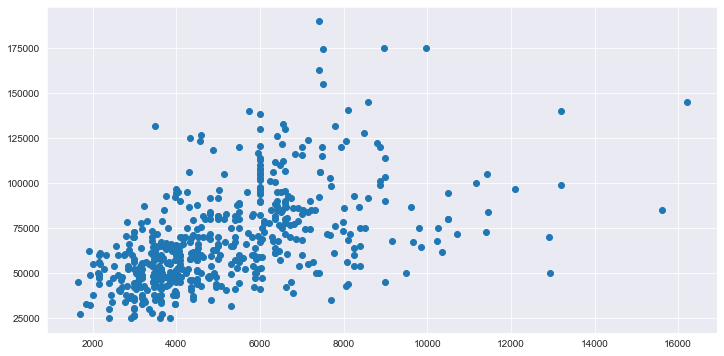

In [7]:
#let's see if we have linear relationship bw price and area

plt.scatter(x=house['area'], y=house['price'])
plt.show()
plt.close()
#we can see plenty of outlier which will definetly affect the best fit line so we have to clean it.
#we have to do this for every variable

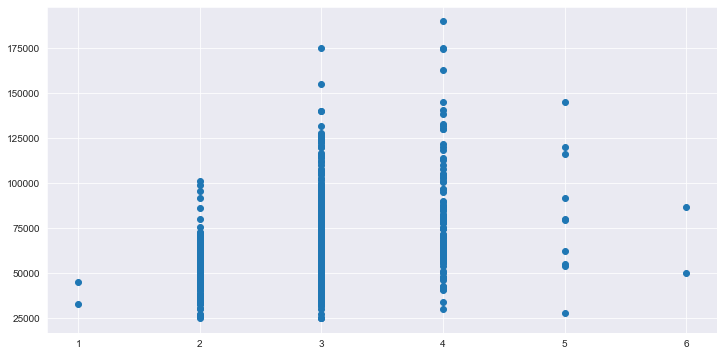

In [8]:
plt.scatter(x=house['rooms'], y=house['price'])
plt.show()
plt.close()

In [9]:
#sns.pairplot(house, size = 5, kind = 'scatter')

In [10]:
# we need to standardize the inputs as theweights assign heavily depend n the quantity or magnitude
# here area value is in thousands where as others are in tens



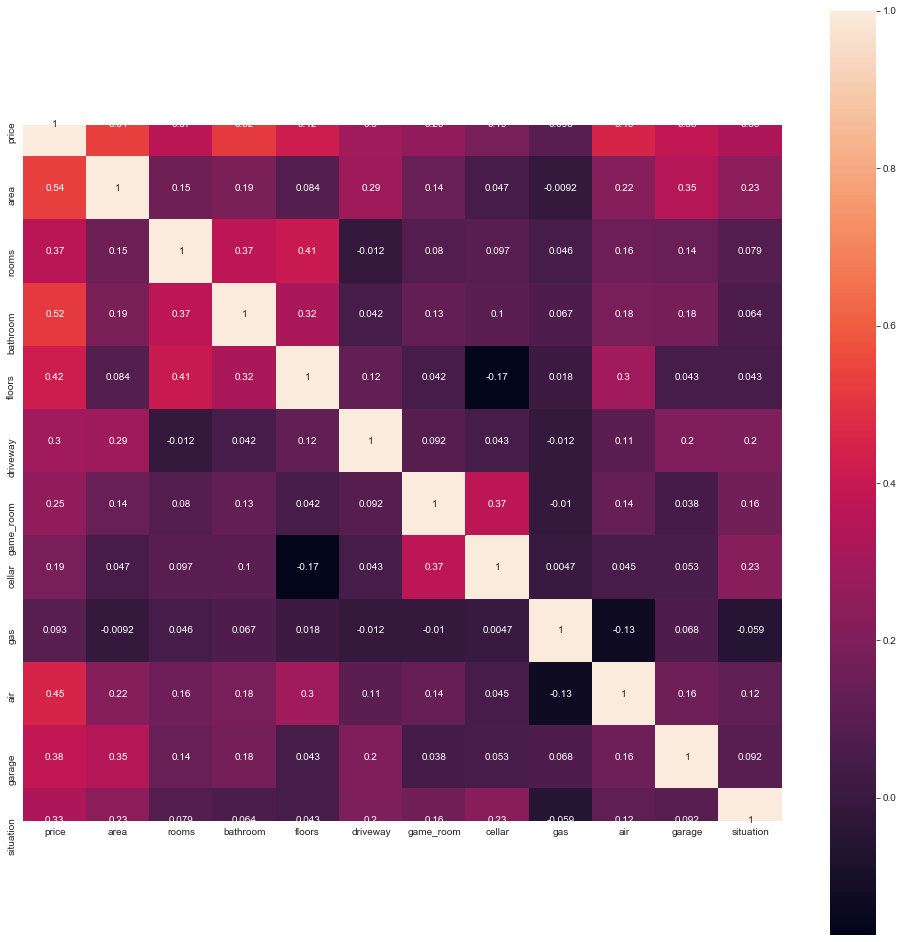

In [11]:
#we have to check for the correlation otherwise weights willbecome bias

#checking correlation

plt.figure(figsize=(17,17))
sns.heatmap(house.corr(), annot=True, square=True)
plt.show()

In [12]:
#importing linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
# instantiate a linear regression object
lm = LinearRegression()

In [14]:
#splitting the data into X and y

X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]

y = house['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=101)

In [16]:
X_test.head()

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
225,2800,3,2,2,0,0,1,0,1,1,0
18,3450,1,1,1,1,0,0,0,0,0,0
48,4960,4,1,3,0,0,0,0,0,0,0
355,10269,3,1,1,1,0,0,0,0,1,1
350,9860,3,1,1,1,0,0,0,0,0,0


In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(lm.coef_)

[3.89376339e+00 2.55486255e+03 1.41206688e+04 6.16725062e+03
 4.75380710e+03 4.38194457e+03 3.74440604e+03 1.42141371e+04
 1.29601437e+04 5.04155805e+03 9.99613065e+03]


In [19]:
#putting coeff in dataframe

coeff = pd.DataFrame(lm.coef_,X.columns, columns = ['Coefficients'] )
coeff

,Coefficients
area,3.893763
rooms,2554.862552
bathroom,14120.668799
floors,6167.250616
driveway,4753.807097
game_room,4381.944571
cellar,3744.406037
gas,14214.137067
air,12960.143692
garage,5041.558049


In [20]:
y_pred = lm.predict(X_test)

In [21]:
training_accuracy = lm.score(X_train, y_train)
training_accuracy

0.6816592418451473

In [22]:
testing_accuracy = lm.score(X_test  , y_test)
testing_accuracy

0.6254111823570911

In [23]:
#since the training score and testing score are not too varied so we can say model isn't overfitting

In [24]:
## Stats model api based linear regression

import statsmodels.api as sm

In [25]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts

#Adding a constant (to get an intercept)

X_train_sm= sm.add_constant(X_train)

C:\Users\AKASH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
res = sm.OLS(y_train, X_train_sm)  
res1 = res.fit()


In [27]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     72.03
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           6.36e-85
Time:                        14:22:04   Log-Likelihood:                -4229.1
No. Observations:                 382   AIC:                             8482.
Df Residuals:                     370   BIC:                             8529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4908.3388   4355.390     -1.127      0.260   -1.35e+04    3656.084
area           3.8938      0.446      8.731      0.000       3.017       4.771
rooms       2554.8626   1339.815      1.907      0.057     -79.745    5189.470
bathroom    1.412e+04   1812.022      7.793      0.000    1.06e+04    1.77e+04
floors      6167.2506   1090.835      5.654      0.000    4022.237    8312.264
driveway    4753.8071   2628.001      1.809      0.071    -413.883    9921.497
game_room   4381.9446   2326.732      1.883      0.060    -193.332    8957.221
cellar      3744.4060   1960.719      1.910      0.057    -111.145    7599.957
gas         1.421e+04   3796.390      3.744      0.000    6748.930    2.17e+04
air         1.296e+04   1901.928      6.814      0.000    9220.199    1.67e+04
garage      5041.5580   1044.320      4.828      0.000    2988.010    7095.106
situation   9996.1307   2022.626      4.942      0.000    6018.847     1.4e+04
==============================================================================
Omnibus:                       66.413   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.421
Skew:                           0.866   Prob(JB):                     2.41e-35
Kurtosis:                       5.649   Cond. No.                     3.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

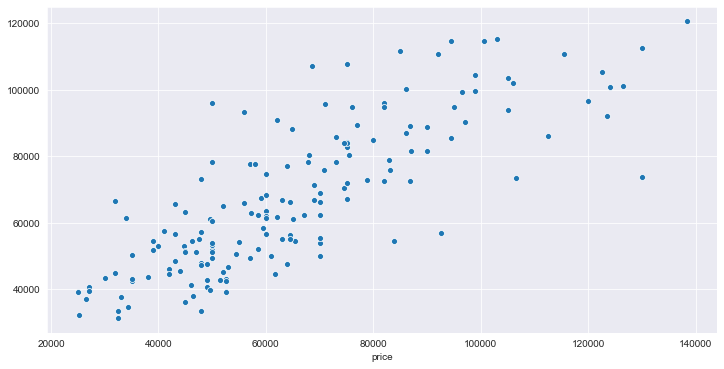

In [28]:
# To check the quality of our model, let's plot it
sns.scatterplot(y_test, y_pred)  # for sklearn model

In [29]:
# Evaluation metrics for sk learn Model
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)

from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE : 11245.248764945301
MSE : 220851427.29447812
RMSE : 14861.070866343318


In [30]:
# for statsmodel model

X_endog_test = sm.add_constant(X_test)

predictions = res1.predict(X_endog_test)

C:\Users\AKASH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
res_test = (y_test - predictions)
res_test


print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE : 11245.248764945272
MSE : 220851427.29447713
RMSE : 14861.070866343285


In [32]:
# R squared value
from sklearn.metrics import r2_score

r2_score(y_test, predictions)


0.6254111823570929

In [33]:
import matplotlib
dir(matplotlib)
matplotlib.__version__

'3.1.1'

Note: you may need to restart the kernel to use updated packages.
